# Question number -- 1

In [ ]:
import pandas as pd
import numpy as np

df =pd.read_csv('final-employee-ds.csv')
training_hours=df['TrainingHours'].values.astype(float)

mean_val=np.mean(training_hours)
std_val=np.std(training_hours)

print(f"Mean: {mean_val:.2f}")
print(f"Standard Deviation: {std_val:.2f}")




Mean: 24.19
Standard Deviation: 13.84


# Question number -- 2

In [ ]:
df['Salary']=df['Salary'].fillna(df.groupby('Department')['Salary'].transform('mean'))
filtered=df[(df['ExperienceYears']>12)&(df['ProjectCount']>5)]

total_salary_sum=filtered['Salary'].sum()
print(f"Total Salary Sum: {total_salary_sum:.1f}")

Total Salary Sum: 1984561.2


# Question number -- 3

In [ ]:
df['Salary']=df['Salary'].fillna(df.groupby('Department')['Salary'].transform('mean'))

filtered=df[
    (df['Department'].isin(['IT','Finance']))&
    (df['Age'].between(30,45))&
    (df['PerformanceScore'] > 88)
].sort_values(by='Salary',ascending=False)

result=filtered[['Name','Department','Salary','PerformanceScore']]
print(result.to_markdown(index=False))


| Name        | Department   |   Salary |   PerformanceScore |
|:------------|:-------------|---------:|-------------------:|
| Employee_95 | IT           |   140386 |                 94 |
| Employee_89 | Finance      |   126027 |                 92 |
| Employee_5  | Finance      |    85543 |                 97 |
| Employee_33 | IT           |    83919 |                 98 |
| Employee_56 | Finance      |    49540 |                 94 |


# Question number -- 4

In [ ]:
df['Salary']=df['Salary'].fillna(df.groupby('Department')['Salary'].transform('mean'))
df['SalaryPerHour']=df['Salary']/(df['WorkHoursPerWeek']*4)

top5=df.sort_values(by='SalaryPerHour',ascending=False).head(5)
result=top5[['Name','SalaryPerHour']]

print(result.to_markdown(index=False))


| Name        |   SalaryPerHour |
|:------------|----------------:|
| Employee_47 |         981.279 |
| Employee_28 |         971.293 |
| Employee_32 |         967.393 |
| Employee_80 |         945.336 |
| Employee_81 |         937.859 |


# Question number -- 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

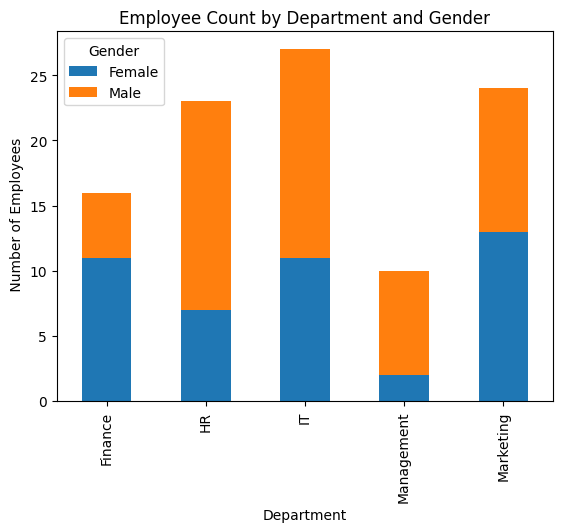

| Department   |   Female |   Male |
|:-------------|---------:|-------:|
| Finance      |       11 |      5 |
| HR           |        7 |     16 |
| IT           |       11 |     16 |
| Management   |        2 |      8 |
| Marketing    |       13 |     11 |


In [ ]:
counts=pd.crosstab(df['Department'],df['Gender'])
counts.plot(kind='bar',stacked=True)
plt.xlabel('Department')
plt.ylabel(' Number of Employees')
plt.title('Employee Count by Department and Gender')
plt.show()

print(counts.to_markdown())